In [1]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

In [2]:
data_file = open("mnist_train.csv", "r")
data_list = data_file.readlines()
data_file.close()

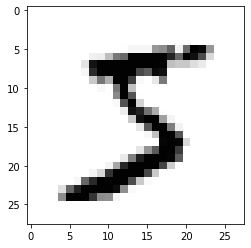

In [3]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [5]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0) * 0.99 + 0.01 #将数据变为0.01~1


In [6]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [7]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [8]:
import scipy.special

In [9]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hndoes = hiddennodes
        self.onodes = outputnodes

        self.wih = np.random.normal(0.0, pow(self.hndoes, -0.5), (self.hndoes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hndoes))

        self.lr = learningrate
        self.activation_function = lambda x : scipy.special.expit(x)
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        outputs_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, outputs_errors)

        self.who += self.lr * np.dot(outputs_errors * final_outputs * (1.0 - final_outputs), hidden_outputs.T)

        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), inputs.T)
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs





In [10]:
input_nodes = 784
hidden_nodes = 100
outputs_nodes = 10
learining_rate = 0.3

In [37]:
net = neuralNetwork(input_nodes, hidden_nodes, outputs_nodes, learining_rate)


In [33]:
training_data_file = open("mnist_train.csv", "r")
training_data_list = training_data_file.readlines()

In [34]:
training_data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
np.asfarray(np.asfarray(training_data_list[0].split(',')))

array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [38]:
epochs = 5

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = np.zeros(outputs_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        net.train(inputs, targets)

In [39]:
test_data_file = open("mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [40]:
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    # print("correct_label", correct_label)
    inputs  = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    outputs = net.query(inputs)
    label = np.argmax(outputs)
    # print("network's answer", label)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)


In [41]:
scorecard_array = np.array(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9522


In [42]:
zeros = np.zeros((5,5))
zeros = zeros.reshape(-1)

In [43]:
zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
zeros = np.zeros((5,5))
zeros = zeros.reshape(-1, 1)

In [45]:
zeros

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

(784,)


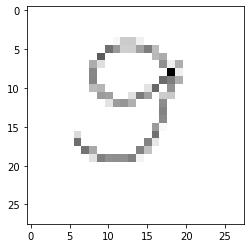

In [54]:
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

image_array = cv.cvtColor(cv.imread("9.png"), cv.COLOR_BGR2GRAY)
plt.imshow(image_array, cmap="gray")
image_array = 255.0 - image_array.reshape(-1)
print(image_array.shape)
image_array = (image_array /255.0 * 0.99) + 0.01


In [52]:
net.query(image_array)

array([[0.00944297],
       [0.00650813],
       [0.00849727],
       [0.01277556],
       [0.00302654],
       [0.08130455],
       [0.00676023],
       [0.00810866],
       [0.09762449],
       [0.02102871]])

In [65]:
import glob
# our own image test data set
our_own_dataset = []

for image_file_name in glob.glob('*.png'):
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])        #截出来的np.array
    
    img_array = cv.cvtColor(cv.imread(image_file_name),cv.COLOR_BGR2GRAY)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(-1)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # append label and image data  to test data set
    record = np.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

In [57]:
np.array([1,2,3,4,5])[-2:-1]

array([4])

[[6.20361043e-02]
 [5.90316293e-04]
 [1.34162630e-04]
 [2.10847379e-03]
 [8.97083967e-03]
 [1.57346143e-01]
 [9.73492489e-02]
 [5.28202810e-03]
 [7.49927422e-04]
 [1.04122312e-03]]
network says  5
no match!


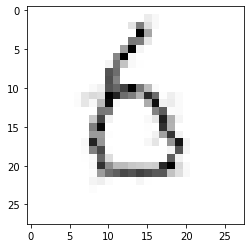

In [70]:
item = 6

matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = net.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = np.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass